In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

# pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'correlations_spec.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'm_test_combined.csv', 'm_test_small.csv', 'm_train_combined.csv', 'm_train_small.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'spec_feature_importances_ohe.csv', 'test_bureau_corrs_removed.csv', 'test_bureau_missing_drop.csv', 'test_bureau_raw.csv', 'test_previous.csv', 'train_bureau_corrs_removed.csv', 'train_bureau_missing_drop.csv', 'train_bureau_raw.csv', 'train_previous.csv']


In [4]:
app = pd.read_csv('../input/application_train.csv')
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
bureau = pd.read_csv('../input/bureau.csv')
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [9]:
previous_loan_counts.head()

,SK_ID_CURR,count
0,100001,7
1,100002,8
2,100003,4
3,100004,2
4,100005,3


In [10]:
# Groupby the client id and count the number of previous loans
previous_loan_counts = bureau.groupby('SK_ID_CURR')['SK_ID_BUREAU'].agg(['count']).reset_index()

# rename the column
previous_loan_counts = previous_loan_counts.rename(columns = {'count': 'previous_loan_counts'})

# Merge with the parent dataframe
app = app.merge(previous_loan_counts[['SK_ID_CURR', 'previous_loan_counts']], on = 'SK_ID_CURR', how = 'left')

The correlation between previous_loan_counts and the TARGET is 0.0041
Median value for loan that was not repaid = 4.0000
Median value for loan that was repaid =     4.0000


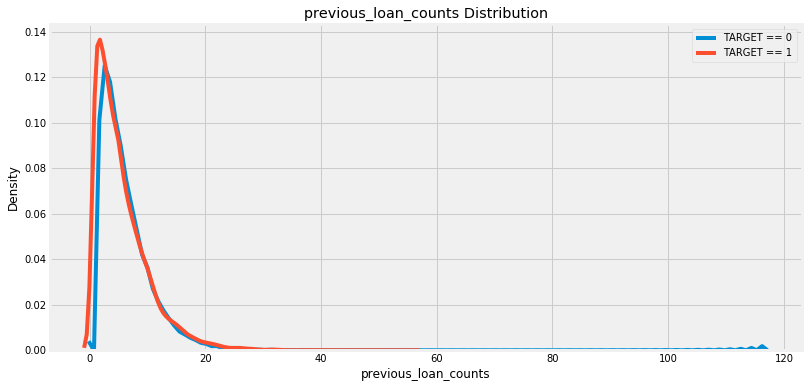

In [14]:
kde_target('previous_loan_counts', app)

In [7]:
train.shape

In [11]:
l = [0, 122, 1, 2, 3, 4, 5]

In [12]:
train.iloc[:, l] .head()

In [16]:
bureau_balance = pd.read_csv('../input/bureau_balance.csv')
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [18]:
bureau_balance = bureau_balance.merge(bureau[['SK_ID_CURR', 'SK_ID_BUREAU']], on = 'SK_ID_BUREAU', how = 'left')

In [21]:
average_loan_max_months_balance.head()

,average_of_max_months_balance
SK_ID_CURR,
100001.0,0.000000
100002.0,-16.890909
100005.0,0.000000
100010.0,-28.500000
100013.0,0.000000


In [22]:
# Groupby the loan id and calculate the max of the months balance
max_months_balance = bureau_balance.groupby('SK_ID_BUREAU', as_index = False)['MONTHS_BALANCE'].agg(['max'])

# Rename the column
max_months_balance = max_months_balance.rename(columns = {'max': 'max_months_balance'})

# Need the client id in the dataframe
max_months_balance = max_months_balance.merge(bureau_balance[['SK_ID_CURR', 'SK_ID_BUREAU']], 
                                              on = 'SK_ID_BUREAU', how = 'left')

# Groupby the client id and calculate the mean of the max
average_loan_max_months_balance = max_months_balance.groupby('SK_ID_CURR')['max_months_balance'].agg(['mean']).reset_index()

# Rename the column
average_loan_max_months_balance = average_loan_max_months_balance .rename(columns = {'mean': 
                                                                                     'average_of_max_months_balance'})

# Merge with the parent dataframe
app = app.merge(average_loan_max_months_balance[['SK_ID_CURR', 'average_of_max_months_balance']], 
                    on = 'SK_ID_CURR', how = 'left')

In [40]:
bureau.loc[:, ['SK_ID_CURR', 'CREDIT_ACTIVE']].sample(100)

,SK_ID_CURR,CREDIT_ACTIVE
249081,300272,Closed
184071,372649,Closed
11978,439867,Active
139751,356210,Closed
1613768,364308,Closed
289977,198730,Closed
245436,177908,Closed
217848,284599,Closed
1292810,136993,Closed
880288,394945,Closed


In [46]:
train = pd.read_csv('../input/application_train.csv')
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


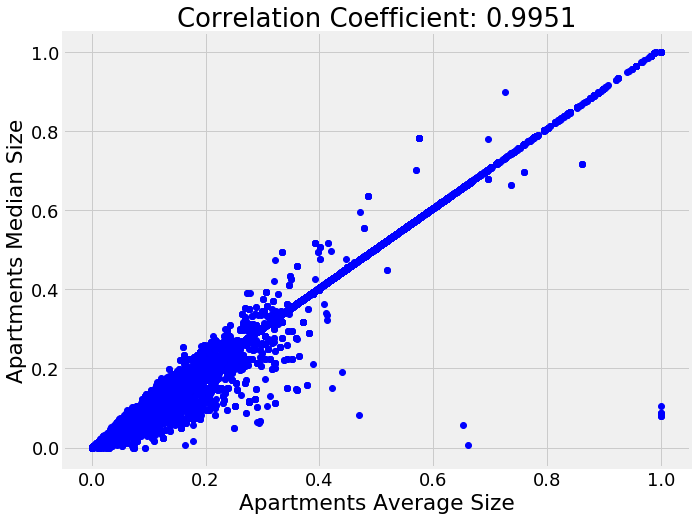

In [49]:
plt.rcParams['font.size'] = 18
plt.figure(figsize = (10, 8))
plt.plot(train['APARTMENTS_AVG'], train['APARTMENTS_MEDI'], 'bo')
plt.title('Correlation Coefficient: %0.4f' % train['APARTMENTS_AVG'].corr(train['APARTMENTS_MEDI']))
plt.xlabel('Apartments Average Size'); plt.ylabel('Apartments Median Size');

In [42]:
train.shape

(10, 344)

In [45]:
train = pd.read_csv('m_train_small.csv', nrows = 10)
train.iloc[:, [343, 234, 123, 332, 43, 220, 219, 243, 221]].head()

,SK_ID_CURR,AMT_REQ_CREDIT_BUREAU_MON,previous_loans_NAME_CLIENT_TYPE_Refreshed_count_norm,previous_loans_NAME_SELLER_INDUSTRY_Consumer electronics_count,LANDAREA_AVG,previous_loans_CHANNEL_TYPE_Contact center_count_norm,client_cash_NAME_CONTRACT_STATUS_Completed_count_norm_max,client_cash_NAME_CONTRACT_STATUS_Signed_count_sum,previous_loans_NAME_SELLER_INDUSTRY_Connectivity_count_norm
0,100002,0.0,0.000000,0.0,0.0369,0.0,0.000000,0.0,0.000000
1,100003,0.0,0.666667,1.0,0.0130,0.0,0.125000,0.0,0.000000
2,100004,0.0,0.000000,0.0,NaN,0.0,0.250000,0.0,1.000000
3,100006,NaN,0.000000,1.0,NaN,0.0,0.333333,0.0,0.000000
4,100007,0.0,0.000000,3.0,NaN,0.0,0.076923,13.0,0.166667


In [30]:
# Use one hot encode to represent the categorical variable
bureau_credit_status = pd.get_dummies(bureau.loc[:, ['SK_ID_CURR', 'ACTIVE_CREDIT']])

# Groupby the client id and calculate the count and normalized count
bureau_credit_status_counts = bureau_credit_status.groupby('SK_ID_CURR').agg(['count', 'mean'])

columns = []

# Create new column names
for col in bureau_credit_status_counts.columns.levels[0]:
    for stat in ['count', 'norm_count']:
        columns.append('%s_%s' % (col, stat))
        
# Rename the columns
bureau_credit_status_counts.columns = columns

# Merge with the parent dataframe
app = app.merge(bureau_credit_status_counts, left_on = 'SK_ID_CURR', 
                right_index = True, how = 'left')

In [33]:
app.iloc[:, [0, 1, 124, 125, 126, 127, 128, 129, 130]].head()

,SK_ID_CURR,TARGET,CREDIT_ACTIVE_Active_count,CREDIT_ACTIVE_Active_norm_count,CREDIT_ACTIVE_Bad debt_count,CREDIT_ACTIVE_Bad debt_norm_count,CREDIT_ACTIVE_Closed_count,CREDIT_ACTIVE_Closed_norm_count,CREDIT_ACTIVE_Sold_count
0,100002,1,8.0,0.25,8.0,0.0,8.0,0.75,8.0
1,100003,0,4.0,0.25,4.0,0.0,4.0,0.75,4.0
2,100004,0,2.0,0.00,2.0,0.0,2.0,1.00,2.0
3,100006,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,1.0,0.00,1.0,0.0,1.0,1.00,1.0


In [29]:
columns

['CREDIT_ACTIVE_Active_count',
 'CREDIT_ACTIVE_Active_norm_count',
 'CREDIT_ACTIVE_Bad debt_count',
 'CREDIT_ACTIVE_Bad debt_norm_count',
 'CREDIT_ACTIVE_Closed_count',
 'CREDIT_ACTIVE_Closed_norm_count',
 'CREDIT_ACTIVE_Sold_count',
 'CREDIT_ACTIVE_Sold_norm_count']

In [27]:
bureau_credit_status_counts.columns.levels[0]

Index(['CREDIT_ACTIVE_Active', 'CREDIT_ACTIVE_Bad debt',
       'CREDIT_ACTIVE_Closed', 'CREDIT_ACTIVE_Sold'],
      dtype='object')

In [25]:
bureau_credit_status_counts.head()

CREDIT_ACTIVE_Active           CREDIT_ACTIVE_Bad debt       \
                          count      mean                  count mean   
SK_ID_CURR                                                              
100001                        7  0.428571                      7  0.0   
100002                        8  0.250000                      8  0.0   
100003                        4  0.250000                      4  0.0   
100004                        2  0.000000                      2  0.0   
100005                        3  0.666667                      3  0.0   

           CREDIT_ACTIVE_Closed           CREDIT_ACTIVE_Sold       
                          count      mean              count mean  
SK_ID_CURR                                                         
100001                        7  0.571429                  7  0.0  
100002                        8  0.750000                  8  0.0  
100003                        4  0.750000                  4  0.0  
100004                        2  1.000000                  2  0.0  
100005                        3  0.333333                  3  0.0

In [21]:
l = [0, 123, 122, 1, 2, 3]
train.iloc[:, l].dropna().head()

In [25]:
# pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')

In [11]:
# Plots the disribution of a variable colored by value of the target
def kde_target(var_name, df):
    
    # Calculate the correlation coefficient between the new variable and the target
    corr = df['TARGET'].corr(df[var_name])
    
    # Calculate medians for repaid vs not repaid
    avg_repaid = df.ix[df['TARGET'] == 0, var_name].median()
    avg_not_repaid = df.ix[df['TARGET'] == 1, var_name].median()
    
    plt.figure(figsize = (12, 6))
    
    # Plot the distribution for target == 0 and target == 1
    sns.kdeplot(df.ix[df['TARGET'] == 0, var_name], label = 'TARGET == 0')
    sns.kdeplot(df.ix[df['TARGET'] == 1, var_name], label = 'TARGET == 1')
    
    # label the plot
    plt.xlabel(var_name); plt.ylabel('Density'); plt.title('%s Distribution' % var_name)
    plt.legend();
    
    # print out the correlation
    print('The correlation between %s and the TARGET is %0.4f' % (var_name, corr))
    # Print out average values
    print('Median value for loan that was not repaid = %0.4f' % avg_not_repaid)
    print('Median value for loan that was repaid =     %0.4f' % avg_repaid)

In [27]:
kde_target(var_name = 'average_of_max_months_balance', df = train)